 Hello, This python notebook is to demonstrate the use of machine learning to filter a SMS as spam/ham.
 This is done using the naive_bayes method.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

Here I have used the dataset from UCI Machine learning Repository site
(https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)


In [10]:
#Loading the data
sms_df=pd.read_csv('spam.csv',encoding='latin-1')
sms_df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


As we can see, the column 'v1' tags the message as spam/ham , and the column 'v2' contains the actual message. 
Rest 3 columns are useless.

## Spam/Ham Classification

In [11]:
X=sms_df.v2
Y=sms_df.v1

In [12]:
#splitting the data into training and testing sets
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

Since the data is in textual form, we need to convert it into some numerical value so that our machine learning model
could train it. This could be done either by CountVectorizer(http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
or TFidfVectorizer(http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

For sake of comparison, I will use both the methods and test the accuracy of the model in each case.

In [14]:
#importing Vectorizer libraries
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#TFidfVectorizer
tf_vec=TfidfVectorizer()
x_train_tf=tf_vec.fit_transform(x_train)
x_test_tf=tf_vec.transform(x_test)


#CountVectorizer
c_vec=CountVectorizer()
x_train_cv=c_vec.fit_transform(x_train)
x_test_cv=c_vec.transform(x_test)

In [16]:
#importing the naive_bayes model
from sklearn.naive_bayes import MultinomialNB 

#training on the TfidfVectorizer 
model_tf=MultinomialNB()
model_tf.fit(x_train_tf,y_train)
y_predict_tf=model_tf.predict(x_test_tf)

#training on the CountVectorizer
model_cv=MultinomialNB()
model_cv.fit(x_train_cv,y_train)
y_predict_cv=model_cv.predict(x_test_cv)



In [19]:
#checking the accuracy of the models

from sklearn.metrics import accuracy_score

print('TfidfVectorizer')
print accuracy_score(y_test,y_predict_tf)

print('\nCountVectorizer')
print accuracy_score(y_test,y_predict_cv)

TfidfVectorizer
0.958744394619

CountVectorizer
0.987443946188


Looks like CountVectorizer is a better choice among the two. And 98% accuracy, thats a good sign. 

## Data Visualization

In [38]:
ham_words=''
spam_words=''
spam=sms_df[sms_df.v1=='spam']
ham=sms_df[sms_df.v1=='ham']

In [39]:
import nltk
from nltk.corpus import stopwords

In [40]:
#Spam Words
for text in spam.v2:
    text=text.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        spam_words+=words+' '
#Ham Words
for text in ham.v2:
    text=text.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        ham_words+=words+' '

In [41]:
from wordcloud import WordCloud

In [45]:
#generating wordcloud
Spam_wordcloud=WordCloud(height=400,width=600).generate(spam_words)
Ham_wordcloud=WordCloud(height=400,width=600).generate(ham_words)

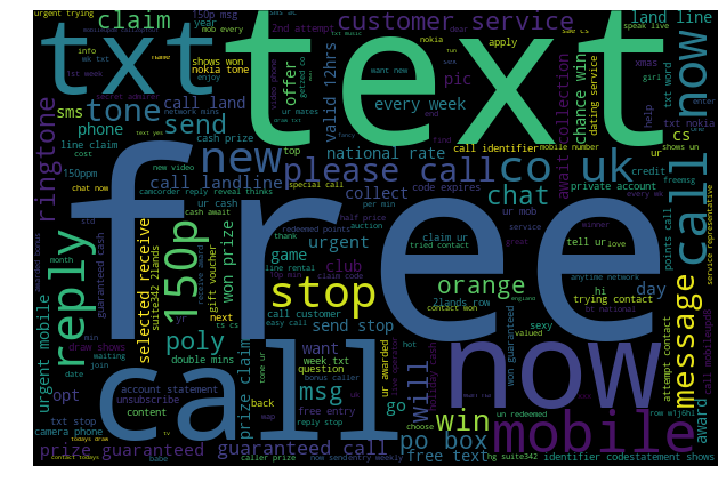

In [50]:
#Spam_wordcloud
plt.figure( figsize=(10,8))
plt.imshow(Spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

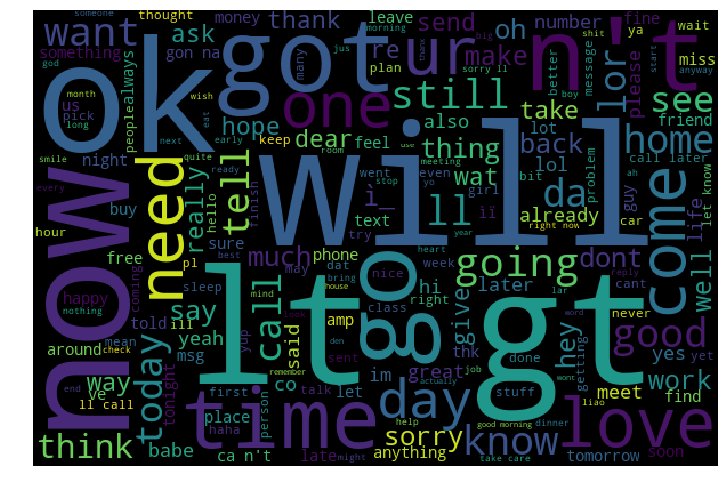

In [53]:
#Ham Wordcloud
plt.figure( figsize=(10,8))
plt.imshow(Ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()